In [ ]:
!pip install PyPDF2
!pip install transformers
import nltk
nltk.download('stopwords')
!pip install the_module_that_warns
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 14.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 15.1 MB/s 
     |████████████████████████████████| 163 kB 66.0 MB/s 
     |████████████████████████████████| 6.6 MB 43.6 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement the_module_that_warns (from versions: none)
ERROR: No matching distribution found for the_module_that_warns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Importing Necessary Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import PyPDF2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
from collections import Counter
from io import StringIO
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
import re
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from string import punctuation
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import warnings
warnings.simplefilter("ignore", UserWarning)
stop_words = set(stopwords.words('english'))

# **Deep Learning models**

Bart Tranformer for text summarization

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

sum_tokenizer= AutoTokenizer.from_pretrained("philschmid/bart-large-cnn-samsum")

sum_model= AutoModelForSeq2SeqLM.from_pretrained("philschmid/bart-large-cnn-samsum")

Downloading:   0%|          | 0.00/300 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Key-Bart Transformer for Title Generation

In [ ]:
!pip install keybert
from keybert import KeyBERT
kw_model= KeyBERT(model='all-mpnet-base-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 20.5 MB/s 
     |████████████████████████████████| 85 kB 5.5 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
     |████████████████████████████████| 1.3 MB 49.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7a305e2e8166217a9b3c7684d64730f1f17ba7493b3314961b37252b160a9f05
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
file_path='/content/19660016262.pdf'

# **Python Class for Summarization**

In [ ]:
class Summarization:
  def __init__(self, file_path, text, clean_text):
    self.file_path=file_path
    self.text=text
    self.clean_text=clean_text
  
  
  def extracttext(file_path):
    filereader=PyPDF2.PdfFileReader(file_path,strict=False)
    pge_count=filereader.getNumPages()
    count=0
    text=[]
    while count<pge_count:
      obj=filereader.getPage(count)
      count+=1
      text.append(obj.extractText())
    text=str(text)
    text=text.replace('\\n', ' ')
    text=text.replace('/s', ' ')
    text=text.replace('\t', ' ')
    text=text.replace('\n', ' ')
    text=text.lower()
    return text
  def clean_text(text):
    newText = text.lower()
    newText = re.sub('[^\w\s\d\.]','',newText)
    newText=re.sub(r'\b\w\b', ' ', newText)
    newText=re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', newText)
    clean_text=soup = BeautifulSoup(newText, 'lxml').get_text()
    clean_text=newText.replace('.', '')
    return clean_text
  def summary(clean_text):
    inputs = sum_tokenizer([clean_text], truncation=True, return_tensors='pt')
    summary_ids = sum_model.generate(inputs['input_ids'],min_length=0)
    summarized_text= ([sum_tokenizer.decode(g) for g in summary_ids])
    summarized_text=summarized_text[0].replace('<s>', '')
    summarized_text=summarized_text.replace('</s>', '')
    return summarized_text
  def title(clean_text):
    keywords = kw_model.extract_keywords(clean_text, keyphrase_ngram_range=(1, 3),stop_words='english',highlight=False, top_n=1)
    keywords_list= list(dict(keywords).keys())
    title= list(dict(keywords).keys())
    return title

**Clean Text**

## **Final Summary**

In [ ]:
def main():
  text=Summarization.extracttext(file_path)
  clean_text=Summarization.clean_text(text)
  title=Summarization.title(clean_text)
  title=title[0].upper()
  print('****Title****\n')
  print(title)
  summary=Summarization.summary(clean_text)
  print('\n ****Summary****\n')
  return summary

main()

****Title****

CONCERNED SPACE NAVIGATION

 ****Summary****



'There is a technical note on the sale by the clearinghouse for federal scientific and technical information springfield virginia. It is a study aimed at simplifying the equations used when applying the kalman filter to space navigation. The transition matrix has been obtained by integratxad ing the perturbation equations of motion.'

# **Keywords Extraction**

In [ ]:
class text_report():
  def __init__(self, clean_text, keywords):
    self.clean_text=clean_text
    self.keywords=keywords
  
  def wordcloud(clean_text):
    word_cloud = WordCloud(width=3000,height=2000,random_state=1,background_color="black",colormap="Pastel1",
                           collocations=False,stopwords=STOPWORDS).generate(clean_text)
    
    plt.figure(figsize=(15, 7))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.savefig("wordcloud.png", format="png") 
    plt.show()
  
  def freqwrd_grph(keywords):
    n_groups = len(keywords)

    vals = [x[1] for x in keywords]
    legends = [x[0] for x in keywords]
    index = np.arange(n_groups)
    opacity = 0.5
    plt.figure(figsize = (15,7))
    graph= plt.bar(index, vals,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')
    plt.xlabel('Keywords')
    plt.ylabel('Occurrences')
    plt.title('Keyword Frequency')
    plt.legend()
    plt.xticks(index, legends)
    plt.tight_layout()
    plt.savefig("Word Frequency graph.png", format="png") 
    plt.show()
  
  def keywords(clean_text):
    word_tokens = word_tokenize(clean_text)
    tokens= [w for w in word_tokens if not w.lower() in stop_words]
    filter_sentence= []
    for w in tokens:
      if w not in stop_words:
        filter_sentence.append(w)
    Counters_found = Counter(filter_sentence)   
    keywords=Counters_found.most_common(10)
    return keywords

  

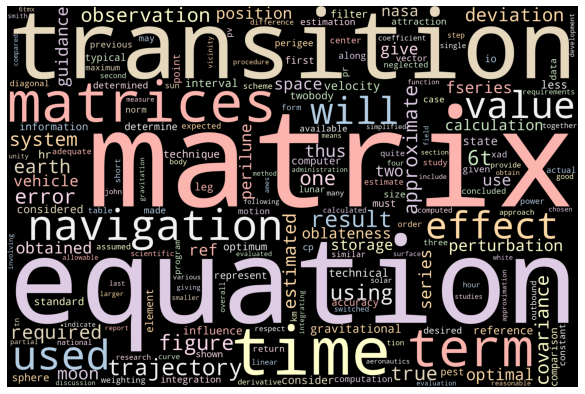

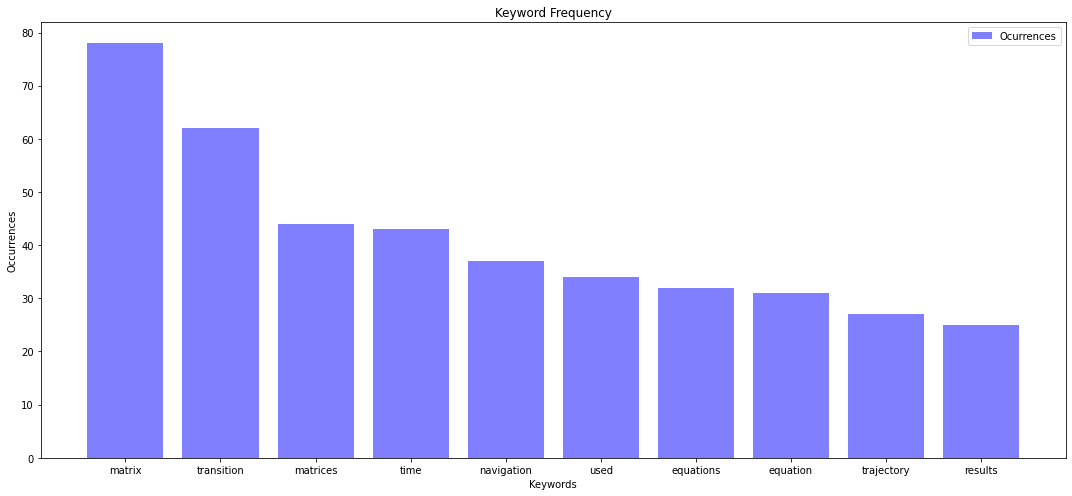

['matrix',
 'transition',
 'matrices',
 'time',
 'navigation',
 'used',
 'equations',
 'equation',
 'trajectory',
 'results']

In [ ]:
def main():
  text=Summarization.extracttext(file_path)
  clean_text=Summarization.clean_text(text)
  wrdcloud=text_report.wordcloud(clean_text)
  keywords_list=text_report.keywords(clean_text)
  freq_grph=text_report.freqwrd_grph(keywords_list)
  keywords=dict(keywords_list)
  keywords= sorted(keywords, key = keywords.get, reverse = True)
  return keywords

main()